In [1]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

In [2]:
y, sr = librosa.load("whittakeri.wav", sr=44100)

In [3]:
IPython.display.Audio(data=y, rate=sr)

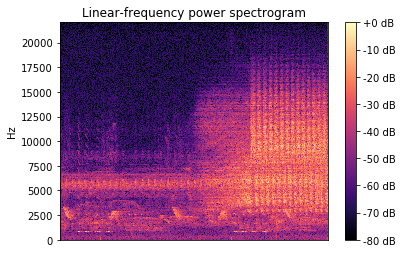

In [3]:
Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
Y_dB = librosa.amplitude_to_db(Y, ref=np.max)
librosa.display.specshow(Y_dB, y_axis='linear', sr=sr, hop_length = 512)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [7]:
Y_amp = Y_dB.mean(1)
Y_var = Y_dB.var(1)

y_axis = np.multiply(list(range(0,683*3)),22050/(683*3))    # eixo y em freq, nao bins

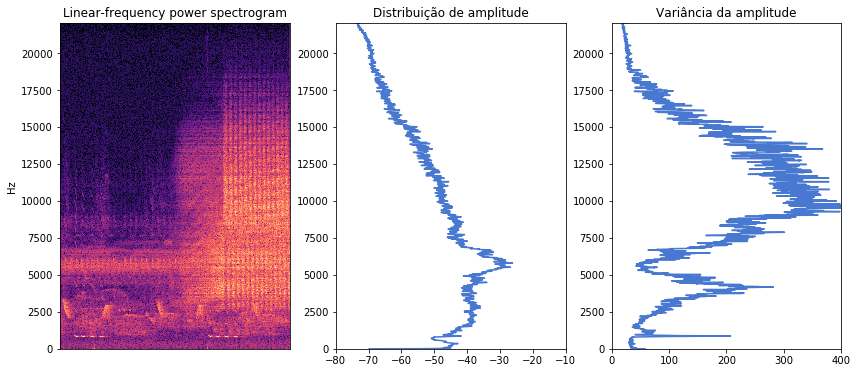

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
librosa.display.specshow(Y_dB, y_axis='linear', sr=sr, hop_length = 512)
#plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.subplot(1,3,2)
plt.plot(Y_amp,y_axis)
plt.title("Distribuição de amplitude")
plt.axis([-80,-10,0,22050])

plt.subplot(1,3,3)
plt.plot(Y_var,y_axis)
plt.axis([0,400,0,22050])
plt.title("Variância da amplitude")

In [10]:
Y_var_t = Y_dB.var(0)
Y_amp_t = Y_dB.var(0)

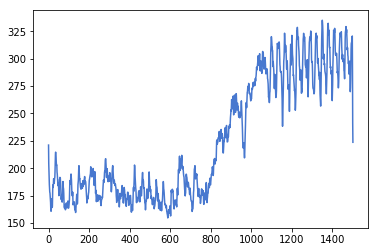

In [16]:
plt.plot(Y_var_t)

In [24]:
Y_var_t = Y_dB[:,:].var(0)
Y_amp_t = Y_dB.sum(0)

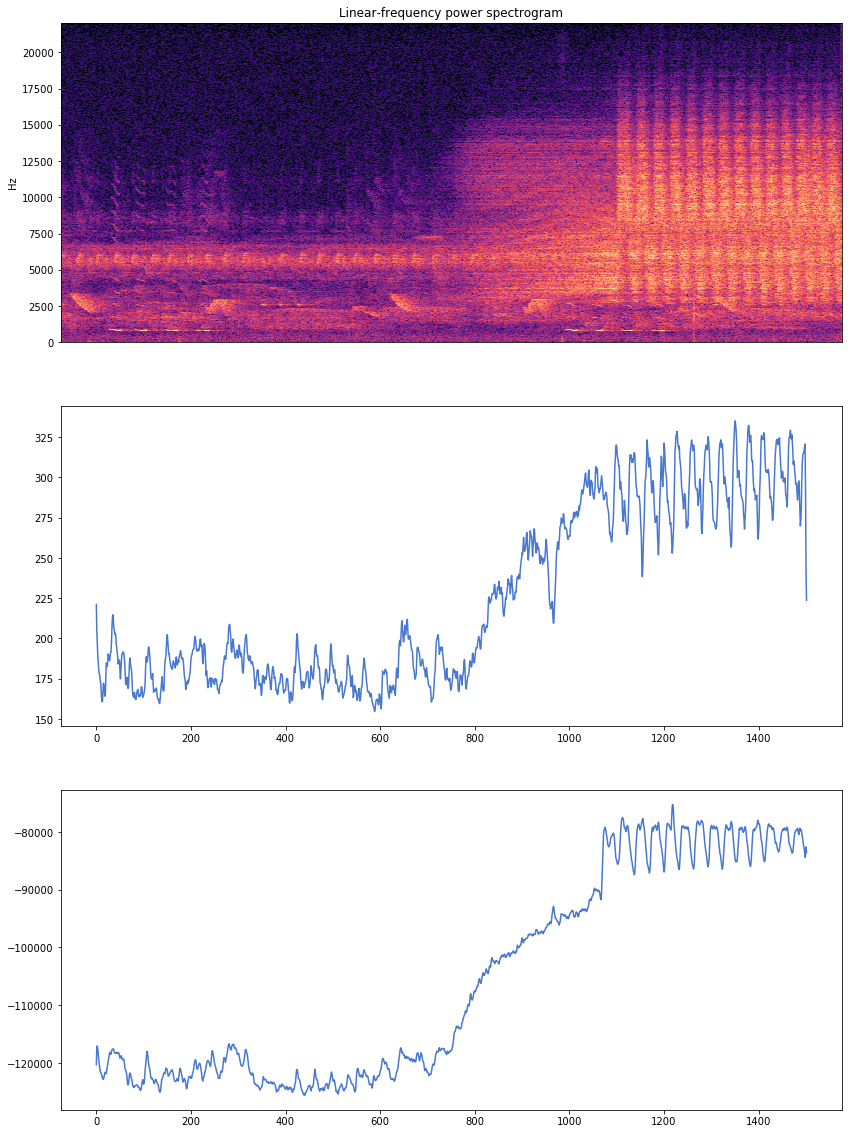

In [28]:
plt.figure(figsize=(14,20))
plt.subplot(3,1,1)
librosa.display.specshow(Y_dB[:,:], y_axis='linear', sr=sr, hop_length = 512)
#plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.subplot(3,1,2)
plt.plot(Y_var_t)


plt.subplot(3,1,3)
plt.plot(Y_amp_t)

## Novelty functions

### Spectral based

In [29]:
mag, phase = librosa.magphase(Y)

In [40]:
gamma = 0.1

magLog = np.log10((1 + mag*gamma))

In [41]:
Y_new = np.multiply(magLog, np.exp(np.multiply(phase, (1j))))

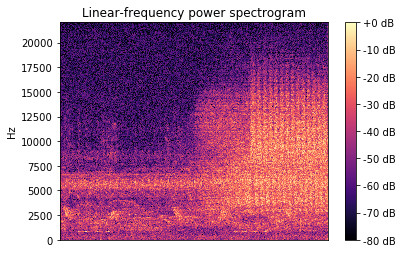

In [42]:
librosa.display.specshow(librosa.amplitude_to_db(Y_new, np.max), y_axis='linear', sr=sr, hop_length = 512)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [146]:
y, sr = librosa.load("whittakeri.wav", sr=44100)
Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
Y_dB = librosa.amplitude_to_db(Y, ref=np.max)

In [147]:
mag, phase = librosa.magphase(Y)
gamma = 1000

magLog = np.log10((1 + mag*gamma))

novelFunc = []

for i in range(magLog.shape[1]-1):
    d = magLog[:,i+1] - magLog[:, i]
    r = np.sum(d)
    rPlus = (r + np.abs(r))/2
    novelFunc.append(rPlus)

In [148]:
len(novelFunc)

1501

[0, 1501, 0, 220]

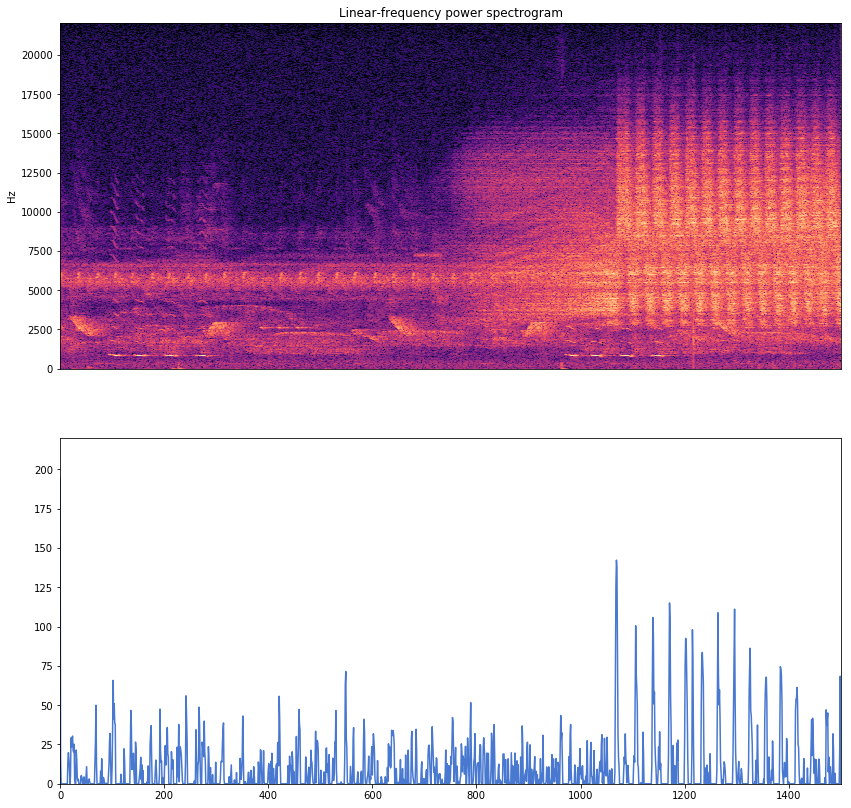

In [150]:
plt.figure(figsize=(14,14))
plt.subplot(2,1,1)
librosa.display.specshow(Y_dB[:,:], y_axis='linear', sr=sr, hop_length = 512)
#plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.subplot(2,1,2)
plt.plot(novelFunc)
plt.axis([0,1501,0,220])

In [153]:
y, sr = librosa.load("natteri.wav", sr=44100)
Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
Y_dB = librosa.amplitude_to_db(Y, ref=np.max)

In [142]:
mag, phase = librosa.magphase(Y)
gamma = 1000

magLog = np.log10((1 + mag*gamma))

novelFunc = []

for i in range(magLog.shape[1]-1):
    d = magLog[:,i+1] - magLog[:, i]
    r = np.sum(d)
    rPlus = (r + np.abs(r))/2
    novelFunc.append(rPlus)

[0, 484, 0, 140]

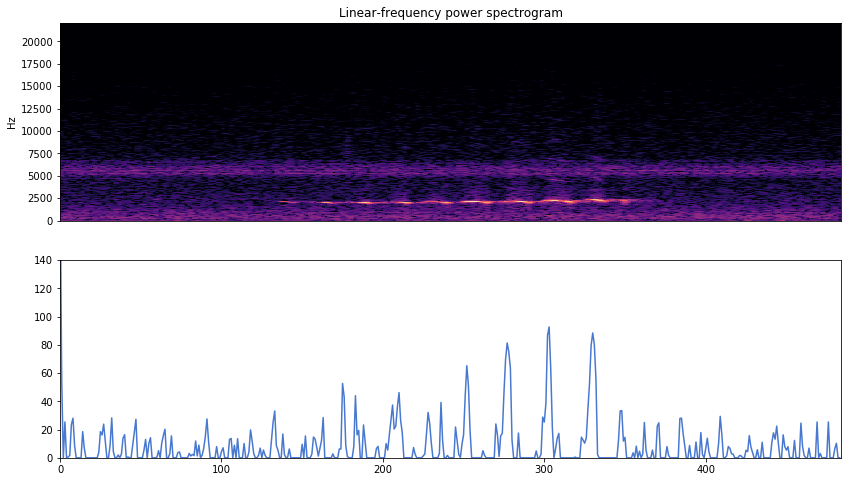

In [143]:
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
librosa.display.specshow(Y_dB[:,:], y_axis='linear', sr=sr, hop_length = 512)
#plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.subplot(2,1,2)
plt.plot(novelFunc)
plt.axis([0,484,0,140])

In [154]:
def princArgument(x):
    if x > 0.5:
        return x - (int(x-0.5) + 1)
    elif x < -0.5:
        return x - (int(x+0.5) - 1)
    else:
        return x

In [155]:
mag, phase = librosa.magphase(Y)
novelFunc = []
a = 0

for i in range(2, mag.shape[1]):
    for j in range(mag.shape[0]):
        d = princArgument(princArgument(phase[j,i] - phase[j, i-1]) - princArgument(phase[j,i-1]-phase[j,i-2]))
        a += d
    novelFunc.append(a)
    a = 0

/home/nicolas/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nicolas/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [159]:
novelFunc

[(-3.222032317891717+9.4711187343054917j),
 (-18.318544263020158-39.37214293051511j),
 (10.29756392724812+31.737356637604535j),
 (-0.37435198202729225-11.343291920488227j),
 (33.89865805581212+20.562943378341842j),
 (-1.1158240661025047-9.1240659000999216j),
 (-10.342693956568837-16.377287095534157j),
 (-12.99142019636929-6.8054481530562043j),
 (-1.5427051186561584+21.437787719759143j),
 (0.8467385470867157-22.159952929931677j),
 (22.865928698331118+30.394139531068504j),
 (3.1052798852324486-4.6654945890135053j),
 (12.944050868973136-22.923455372452736j),
 (9.9838977102190256+20.232990587008644j),
 (-5.2564021274447441-10.70757732540369j),
 (-12.997700780630112-2.8855356295877215j),
 (-0.19147840514779091+13.16573927749927j),
 (0.67127936333417892-33.109316946594518j),
 (-24.394976869225502+58.643223792091959j),
 (-12.955906748771667-42.328142514573884j),
 (-3.7966456450521946+2.027491744607687j),
 (-9.9136926755309105+20.435748465237666j),
 (4.6468345625326037+12.04604408541789j),
 (-